In [12]:
import torch
import fastai
from fastai.vision.all import *

print(torch.__version__)
print(fastai.__version__)

2.5.1+cu121
2.8.2


=> all of datasets in fastai

In [13]:
import inspect
from fastai.data.external import URLs

# List all dataset names
for name, value in inspect.getmembers(URLs):
    if not name.startswith("_"):
        print(name, "→", value)
       


ADULT_SAMPLE → https://s3.amazonaws.com/fast-ai-sample/adult_sample.tgz
AG_NEWS → https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv.tgz
AMAZON_REVIEWS → https://s3.amazonaws.com/fast-ai-nlp/amazon_review_full_csv.tgz
AMAZON_REVIEWS_POLARITY → https://s3.amazonaws.com/fast-ai-nlp/amazon_review_polarity_csv.tgz
BIWI_HEAD_POSE → https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz
BIWI_SAMPLE → https://s3.amazonaws.com/fast-ai-sample/biwi_sample.tgz
CALTECH_101 → https://s3.amazonaws.com/fast-ai-imageclas/caltech_101.tgz
CAMVID → https://s3.amazonaws.com/fast-ai-imagelocal/camvid.tgz
CAMVID_TINY → https://s3.amazonaws.com/fast-ai-sample/camvid_tiny.tgz
CARS → https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars.tgz
CIFAR → https://s3.amazonaws.com/fast-ai-sample/cifar10.tgz
CIFAR_100 → https://s3.amazonaws.com/fast-ai-imageclas/cifar100.tgz
COCO_SAMPLE → https://s3.amazonaws.com/fast-ai-coco/coco_sample.tgz
COCO_TINY → https://s3.amazonaws.com/fast-ai-coco/coco_tiny.tgz
CUB_2

=> TO download dataset via untar_data

In [14]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('C:/Users/Asrorbek/.fastai/data/camvid_tiny/codes.txt'),Path('C:/Users/Asrorbek/.fastai/data/camvid_tiny/images'),Path('C:/Users/Asrorbek/.fastai/data/camvid_tiny/labels')]

=> to write label getter function

In [15]:
def label_getter(file):
          return path/'labels'/f'{file.stem}_P{file.suffix}'


# dataloaders

dls = SegmentationDataLoaders.from_label_func(path, bs=8,
                                              fnames = get_image_files(path/'images'),
                                               label_func = label_getter, 
                                               codes = np.loadtxt(path/'codes.txt', dtype=str))

# fine_tuning


learn = unet_learner(dls, resnet34)
learn.fine_tune(4)


epoch,train_loss,valid_loss,time
0,2.737366,1.883644,00:05


epoch,train_loss,valid_loss,time
0,1.723644,1.302607,00:02
1,1.581263,1.187318,00:01
2,1.422305,0.939029,00:01
3,1.295093,0.922496,00:01


In [16]:
# to see file path

!dir "C:/Users/Asrorbek/.fastai/data/camvid_tiny/labels"

 Volume in drive C has no label.
 Volume Serial Number is 84EC-7985

 Directory of C:\Users\Asrorbek\.fastai\data\camvid_tiny\labels

10/30/2018  08:49 PM    <DIR>          .
10/30/2018  08:49 PM    <DIR>          ..
10/30/2018  08:49 PM             1,124 0001TP_006750_P.png
10/30/2018  08:49 PM             1,125 0001TP_006840_P.png
10/30/2018  08:49 PM             1,189 0001TP_007500_P.png
10/30/2018  08:49 PM             1,126 0001TP_007860_P.png
10/30/2018  08:49 PM             1,149 0001TP_008070_P.png
10/30/2018  08:49 PM             1,023 0001TP_008160_P.png
10/30/2018  08:49 PM             1,065 0001TP_008400_P.png
10/30/2018  08:49 PM             1,330 0001TP_008580_P.png
10/30/2018  08:49 PM             1,626 0001TP_008670_P.png
10/30/2018  08:49 PM             1,310 0001TP_008700_P.png
10/30/2018  08:49 PM             1,472 0001TP_008760_P.png
10/30/2018  08:49 PM             1,343 0001TP_008940_P.png
10/30/2018  08:49 PM             1,288 0001TP_009000_P.png
10/30/2018  08:4

=> accuracy

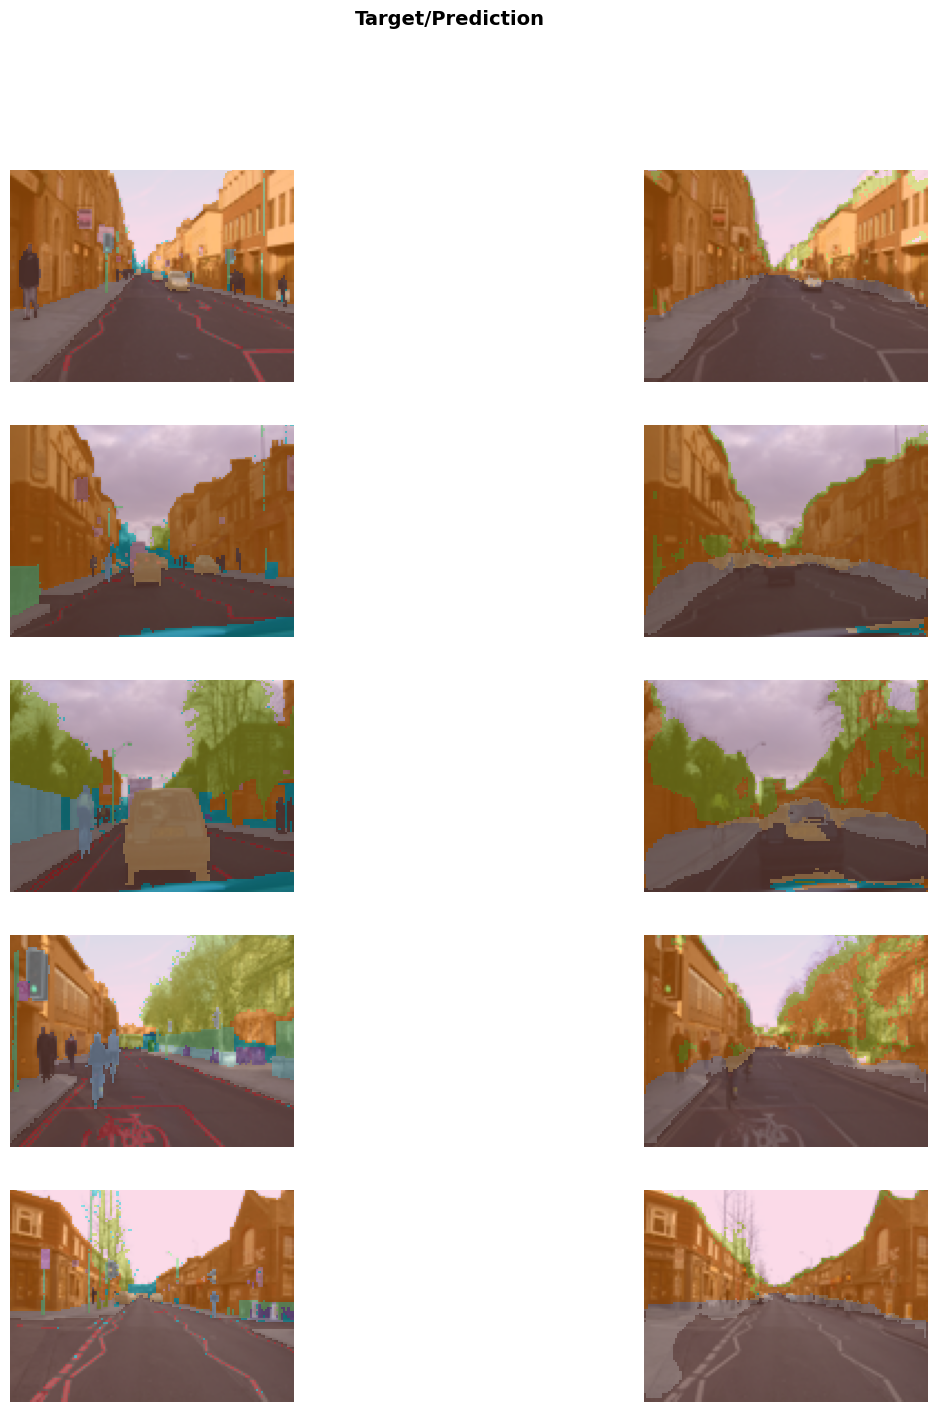

In [17]:
learn.show_results(max_n=5, figsize = (15, 16))

=> to download pkl file

In [18]:
#learn.export('d:/PycharmProjects/AllProjects_of_Python/DeepLearning/SemanticSegmantation/self_drivingcar.pkl')

In [19]:
#learn = load_learner('self_drivingcar.pkl')